# Final Project 3 - Ensemble and Random Forest

Created-by: Kelompok 9  
Class: PYTN-KS18
  
  
Member 1 : Vincent Tanaka - PYTN-KS18-013  
Member 2 : Audris Vondrea Wirduno - PYTN-KS18-02

## a. Introduction

### a.1 Background
Dalam proyek ini, Kelompok 9 akan bekerja dengan *dataset* https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data *"Heart Failure Clinical Data*" yang tersedia di *Kaggle*. *Dataset* ini merupakan kumpulan *data* yang mengandung fitur klinis penting yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Kegagalan jantung merupakan salah satu penyebab utama kematian di seluruh dunia, sehingga memahami faktor-faktor yang berkontribusi terhadapnya adalah penting untuk intervensi medis yang lebih efektif.

### a.2 About Dataset

Dataset ini terdiri dari **13** fitur yang mencakup :  
**1. age** - umur pasien  
**2. anaemia** - apakah ada pengurangan haemoglobin  
**3. creatinine_phosphokinase** - level enzim CPK dalam mcg/L  
**4. diabetes** - apakah pasien punya riwayat diabetes  
**5. ejection_fraction** - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung  
**6. high_blood_pressure** - apakah pasien punya darah tinggi  
**7. platelets** - jumlah platelet di darah dalam kiloplatelets/mL  
**8. serum_creatinine** - level serum creatinine di darah dalam mg/dL  
**9. serum_sodium** - level serum sodium di darah dalam mEq/L  
**10. sex** - apakah pasien pria atau wanita  
**11. smoking** - apakah pasien merokok  
**12. time** - waktu dalam hari untuk follow-up  
**13. DEATH_EVENT** - apakah pasien sudah meninggal saat waktu follow-up  

### a.3 Project Objectives

 Tujuan utama dari analisis ini adalah
 - Untuk membangun model prediktif yang dapat mengidentifikasi pasien yang berisiko tinggi terkena gagal jantung, sehingga memungkinkan intervensi dini dan perawatan yang lebih baik.
 - Mengevaluasi model ENsemble dan Random Foest yang dibuat dalam memprediksi gagal jantung pada *dataset*.

Analisis ini tidak hanya akan memberikan wawasan tentang faktor-faktor yang mempengaruhi gagal jantung, tetapi juga akan membantu dalam pengembangan model pembelajaran mesin yang dapat digunakan oleh profesional kesehatan untuk memperbaiki hasil bagi pasien dengan risiko gagal jantung.

## b. *Import Libraries*

In [1]:
# Import the needed datasets
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler

## c. *Dataset Loading*

In [2]:
# Specify Compressed FIle Path
compressed_file_path = "Heart Failure.zip"
# Call the dataset using dataframes
df = pd.read_csv("Heart Failure.zip", compression="zip")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.shape

(299, 13)

Dari hasil ini, dataset yang dikerjakan akan memiliki fitur sebanyak 13 kolom dengan **death event** sebagai kolom yang dilabel. Selain itu jumlah data ada sebanyak 299 baris.

## d. *Data Cleaning*

Ada 3 tahap utama yang akan digunakan disini yaitu: *duplicate data, missing values, & data types handling.*

### d.1 *Duplicate Handling*

In [6]:
df.duplicated().sum()

0

Tidak ada data duplikat pada dataset ini, proses dilanjut dengan mengecek *missing value*.

### d.2 *Missing Value Handling*

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Sama seperti sebelumnya, data bersih dari *missing values*, proses bisa dilanjut dengan mengubah *data type*.

### d.3 *Data Type Checking*

In [8]:
df['time'].unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

Dari hasil pengecekan *unique values* ini bisa disimpulkan bahwa data ini merupakan data hari dimana data hari biasanya berkisar dari 1-364.

In [9]:
df = df.rename(columns={'time':'day'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  day                       299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### d.4 *Outlier Handling*

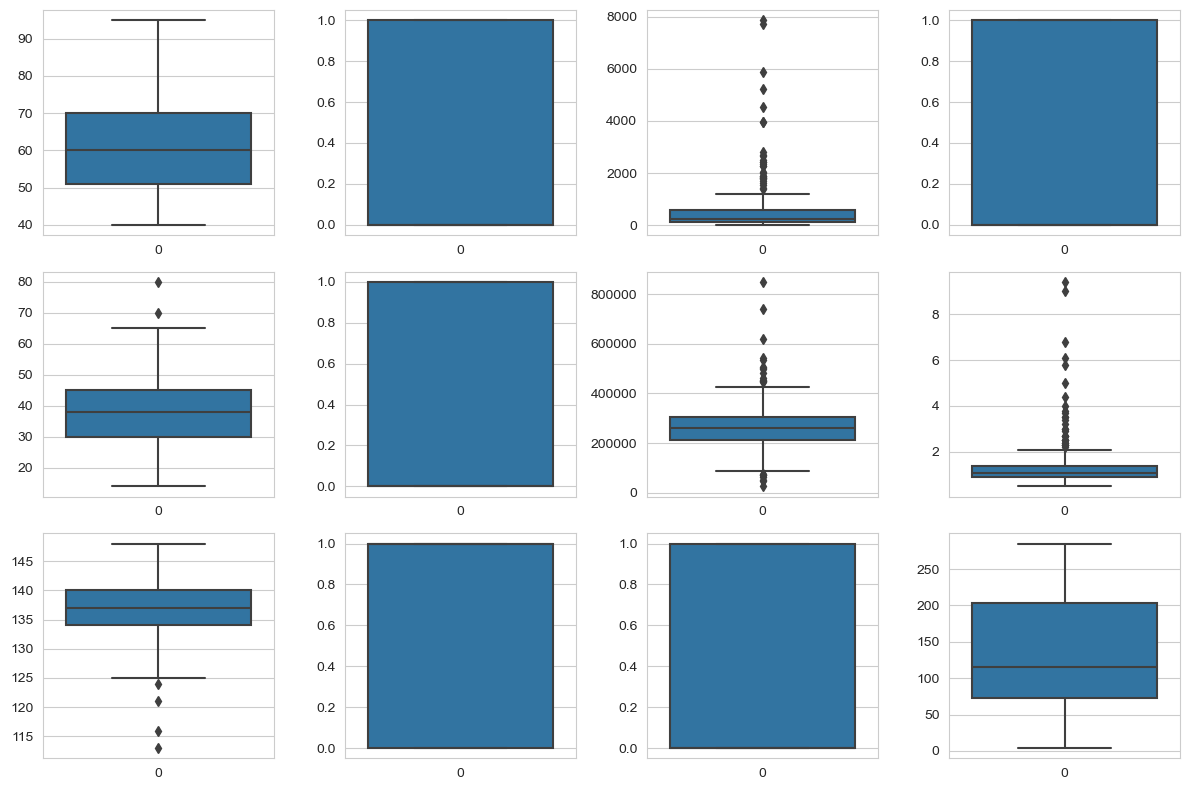

In [10]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(12,8))
for var, subplot in zip(df.columns, ax.flatten()):
        sns.boxplot(df[var], ax=subplot)
plt.tight_layout()
plt.show()

Ada 3 solusi yang bisa digunakan untuk meng*handle* *outlier* ini, untuk metode yang digunakan di dataset ini adalah dengan menghapus data *outlier* menggunakan *IQR*.

In [11]:
# Outlier detection with IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Create the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Make a new var to filter the outliers
mask = (df >= lower_bound) & (df <= upper_bound)

# Use the mask to keep only the rows where all values are within the bounds
df = df[mask.all(axis=1)]

Disini df akan difilter berdasarkan variable 'mask' yang dibuat yaitu menyimpan baris data yang sesuai dengan syarat yang ada di variabel 'mask'.

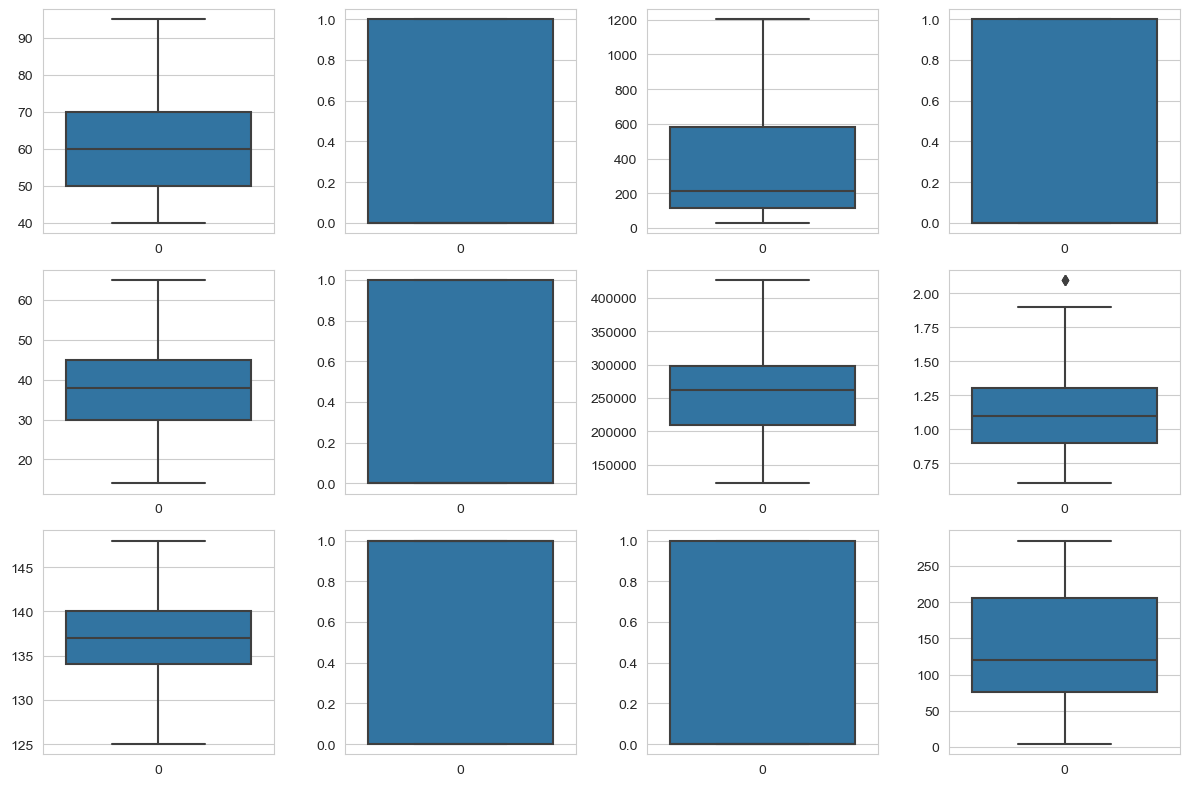

In [12]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(12,8))
for var, subplot in zip(df.columns, ax.flatten()):
        sns.boxplot(df[var], ax=subplot)
plt.tight_layout()
plt.show()

Setelah data cleaning dilakukan, proses bisa dilanjut dengan *EDA(Explanatory Data Analysis)*.

## e. *Data Exploration*

### e.1 *Measure of Central Tendency*

In [13]:
# Calculate the Central Tendency of each numerical columns
central_tendency = df.describe().T
central_tendency.reset_index().rename(
    columns={'index': 'Attributes'})

,Attributes,count,mean,std,min,25%,50%,75%,max
0,age,224.0,60.809527,11.946085,40.0,50.00,60.0,70.0,95.0
1,anaemia,224.0,0.468750,0.500140,0.0,0.00,0.0,1.0,1.0
2,creatinine_phosphokinase,224.0,336.941964,279.521085,30.0,114.50,212.0,582.0,1202.0
3,diabetes,224.0,0.419643,0.494606,0.0,0.00,0.0,1.0,1.0
4,ejection_fraction,224.0,38.178571,11.710801,14.0,30.00,38.0,45.0,65.0
5,high_blood_pressure,224.0,0.379464,0.486340,0.0,0.00,0.0,1.0,1.0
6,platelets,224.0,255865.190045,67153.749051,122000.0,210000.00,262500.0,297250.0,427000.0
7,serum_creatinine,224.0,1.128571,0.327794,0.6,0.90,1.1,1.3,2.1
8,serum_sodium,224.0,137.044643,3.806740,125.0,134.00,137.0,140.0,148.0
9,sex,224.0,0.642857,0.480231,0.0,0.00,1.0,1.0,1.0


### e.2 *Measure of Variability*

### e.3 *Simple Data Grouping*

In [14]:
vis_df = df.copy()
vis_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,day,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


In [15]:
# Convert days to months and round up to the results
vis_df['month'] = np.ceil(df['day'] / 30).astype(int)

In [16]:
vis_df.drop(columns='day', inplace=True)
vis_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,month
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,1,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,1,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,1,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,1,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,1,1


In [17]:
vis_df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## f. *Data Preprocessing*

### f.1 *Correlation Check*

### f.2 *Data Split Train Test*

Di Proses ini, *data* akan dicheck jumlah *labeled* datanya disertakan dengan pemisahan kolom fitur (X) dan kolom label (y) yang ada. Lalu diakhiri dengan pembagian data train dan test menjadi 80:20

In [18]:
# Split the feature and label columns
X = df.drop('DEATH_EVENT', axis=1)
y = df[('DEATH_EVENT')]

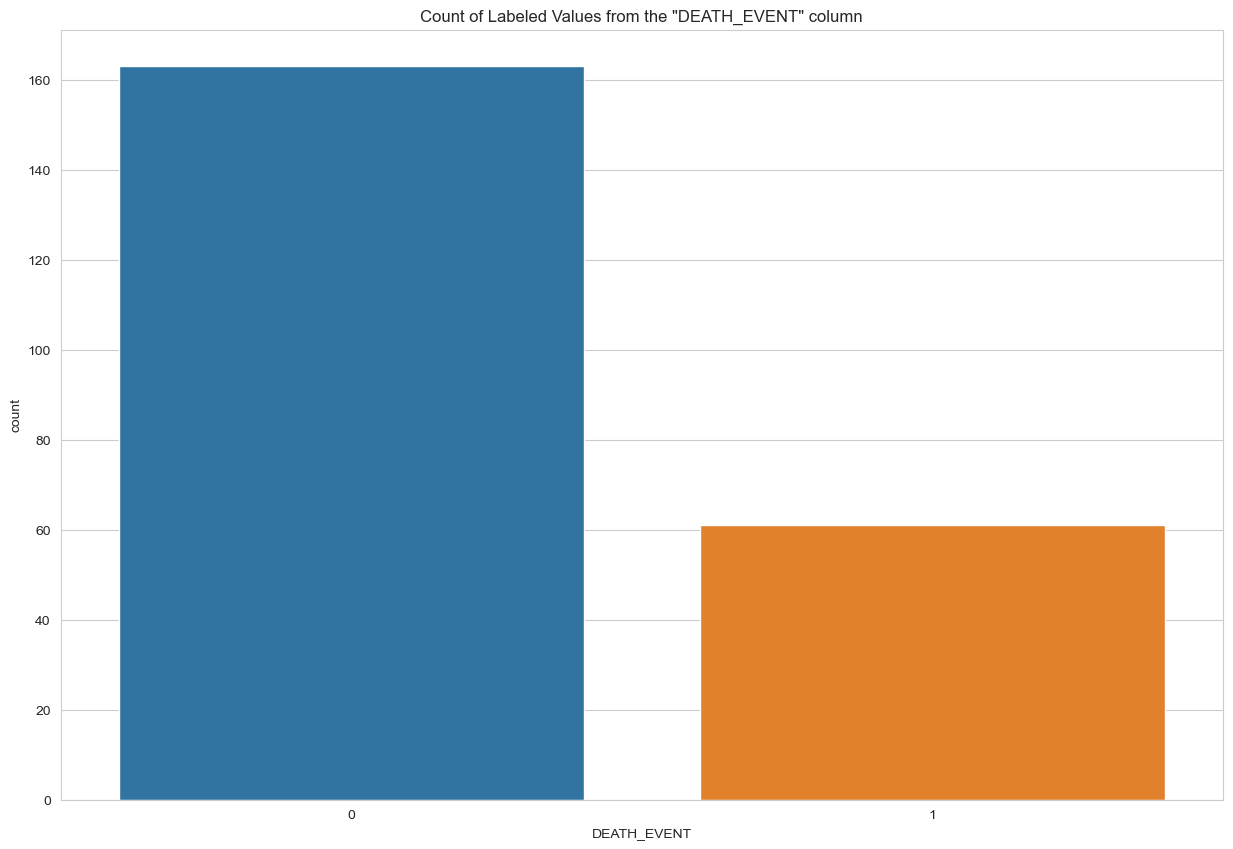

In [19]:
# Plot the labeled data
plt.figure(figsize=(15,10))
sns.countplot(x=df['DEATH_EVENT'])
plt.title('Count of Labeled Values from the "DEATH_EVENT" column')
plt.show()

Dari hasil plot diatas pada kolom *'DEATH_EVENT'* data bisa dinyatakan unbalanced, dimana jumlah data berlabel 0 > data berlabel 1. Solusi yang akan digunakan oleh kelompok 9 disini adalah dengan penggunaan SMOTE untuk oversampling. Diharapkan jumlah *label data* akan seimbang satu sama lain di proses akhirnya lalu diakhiri dengan *split* *train* dan *test*.

In [20]:
X, y = SMOTE().fit_resample(X, y)

In [21]:
y.value_counts()

1    163
0    163
Name: DEATH_EVENT, dtype: int64

Disini jumlah data sudah *balanced*, proses akan dilanjut dengan *split data train test.*

In [22]:
# Split the train test data into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### f.3 *Standarization*

Disini data akan distandarisasi menggunakan *StandardScaler*

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
print('X_train (row, column)', X_train.shape)
print('X_test (row, column)', X_test.shape)
print('y_train (row, column)', y_train.shape)
print('y_test (row, column)', y_test.shape)

X_train (row, column) (260, 12)
X_test (row, column) (66, 12)
y_train (row, column) (260,)
y_test (row, column) (66,)


## g. *Define the model*

### g.1 *Random Forest*

In [25]:
# Define the Model
rf = RandomForestClassifier(random_state=1)

In [26]:
# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = rf.predict(X_test)

# Evaluate the optimized model
print("Accuracy (Optimized):", accuracy_score(y_test, y_pred_optimized))
print(classification_report(y_test, y_pred_optimized))


Accuracy (Optimized): 0.8787878787878788
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.83      0.94      0.88        31

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.89      0.88      0.88        66



In [27]:
# Test a bunch of parameter for Random Forest and find the best one
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['log2', 'sqrt', None],
    'criterion': ['gini','entropy']
}

In [28]:
# Initialize the grid search model
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                         cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
#grid_search.fit(X_train, y_train)

# Best parameters
#print("Best Parameters:", grid_search.best_params_)

In [34]:
# Reinitialize the RandomForestClassifier with the best parameters
best_rf = RandomForestClassifier(
    max_depth=10, 
    max_features='log2', 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=50,
    criterion='entropy'
)

# Retrain the model on the training data
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = best_rf.predict(X_test)

# Evaluate the optimized model
print("Accuracy (Optimized):", accuracy_score(y_test, y_pred_optimized))
print(classification_report(y_test, y_pred_optimized))


Accuracy (Optimized): 0.8939393939393939
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        35
           1       0.85      0.94      0.89        31

    accuracy                           0.89        66
   macro avg       0.90      0.90      0.89        66
weighted avg       0.90      0.89      0.89        66



In [30]:
# Base models
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Stacking Classifier
# The final_estimator is a meta-model that makes the final prediction
stacking_clf = StackingClassifier(estimators=[('rf1', rf1), ('rf2', rf2)], 
                                  final_estimator=LogisticRegression())

# Fit the ensemble model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = stacking_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8939393939393939
